In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn

In [ ]:
file = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [ ]:
file.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


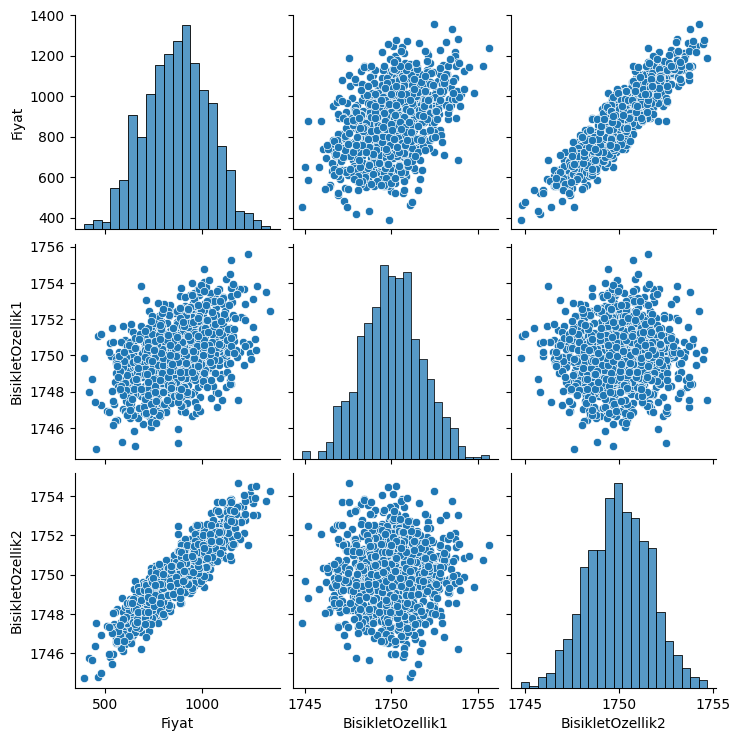

In [ ]:
# Show Data details as graphs:

sbn.pairplot(file)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# There are two features. Bring them together in x
x = file[["BisikletOzellik1", "BisikletOzellik2"]]


# y present target label, price (Fiyat)
y= file["Fiyat"]



In [ ]:
# Split data as train data and test data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 15 )


In [ ]:
# Scaling process:
from sklearn.preprocessing import MinMaxScaler

olcek = MinMaxScaler()

# Fit process:
olcek.fit(x_train)

# Update x_train and x_test data as scaled versions.

x_train = olcek.transform(x_train)
x_test = olcek.transform(x_test)

# Operations with TensorFlow

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential


In [ ]:
from tensorflow.keras.layers import Dense

# Create Model and Layers:

In [ ]:
# Building Model:
model = Sequential()

# Creating layers:
model.add(Dense(5, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(5, activation = "relu"))

# Output layer
model.add(Dense(1))



In [ ]:
# Determine optimization algorithm

model.compile(optimizer = "rmsprop", loss = "mse")

MSE = Mean Squared Error

# Train Data

In [ ]:
model.fit(x,y, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 60819.0195
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 26863.4004
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 27193.6582
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 27037.0586
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 27130.7480
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 27073.1973
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 27094.3574
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 26857.4473
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 27033.1973
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 27047.2168
Epoch 11/250
32/32 [==============================] - 0s 2ms/step - loss: 26996.8789
Epoch 12/250
32/32 [==============================] - 0s 2ms/step - loss: 

# Show loss

<Axes: >

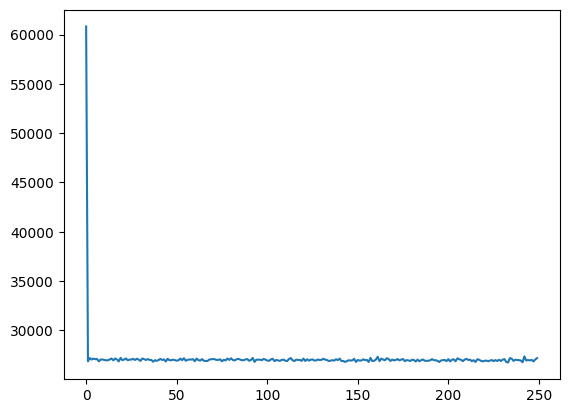

In [ ]:

loss = model.history.history["loss"]
sbn.lineplot(x = range(len(loss)), y =loss)

# Testing performances:

In [ ]:
trainloss = model.evaluate(x_train, y_train)

testloss = model.evaluate(x_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 772741.6250


# Prediction

In [ ]:
# Pretiction by x_test
testPrediction = model.predict(x_test)


11/11 [==============================] - 0s 2ms/step


In [ ]:
testPrediction

array([[0.4176647 ],
       [0.26844767],
       [0.3561578 ],
       [0.31721383],
       [0.3113679 ],
       [0.13877642],
       [0.3593322 ],
       [0.37209982],
       [0.39728618],
       [0.3929811 ],
       [0.31482568],
       [0.38619226],
       [0.34212214],
       [0.41512015],
       [0.45852774],
       [0.26850003],
       [0.39988115],
       [0.22325578],
       [0.40328962],
       [0.35807055],
       [0.35151356],
       [0.31826946],
       [0.23581716],
       [0.21245901],
       [0.34910575],
       [0.43479505],
       [0.2793255 ],
       [0.2922725 ],
       [0.32309476],
       [0.29957914],
       [0.17888412],
       [0.330849  ],
       [0.29042637],
       [0.24705979],
       [0.34097385],
       [0.32886043],
       [0.40877175],
       [0.36975342],
       [0.34658414],
       [0.32769287],
       [0.3109869 ],
       [0.42764735],
       [0.42356133],
       [0.42494744],
       [0.37791464],
       [0.25267047],
       [0.3943611 ],
       [0.354

Transform prediction data and real data (y_test) to numpy arrays. Flatten np arrays, otherwise we get ValueError because structure of the matrix.

In [ ]:
# For testPrediction data
testPrediction_np = np.array(testPrediction)
testPrediction_np_f = testPrediction_np.flatten()


In [ ]:
# For y_test data
y_test_np = np.array(y_test)
y_test_np_f = y_test_np.flatten()

# Bring together 2 flattened numpy array in pandas Dataframe

In [ ]:

df = df = pd.concat([pd.Series(y_test_np_f, name='Real Y'), pd.Series(testPrediction_np_f, name='Predicted Y')], axis=1)

In [ ]:
df

,Gerçek Y,Tahmin Y
0,1081.652164,0.417665
1,622.675990,0.268448
2,889.356810,0.356158
3,902.826733,0.317214
4,897.662404,0.311368
...,...,...
325,1028.438035,0.402622
326,789.934950,0.291351
327,758.490486,0.323342
328,1172.871659,0.457296


# Compare real data and predicted data in graph:

<Axes: xlabel='Real Y', ylabel='Predicted Y'>

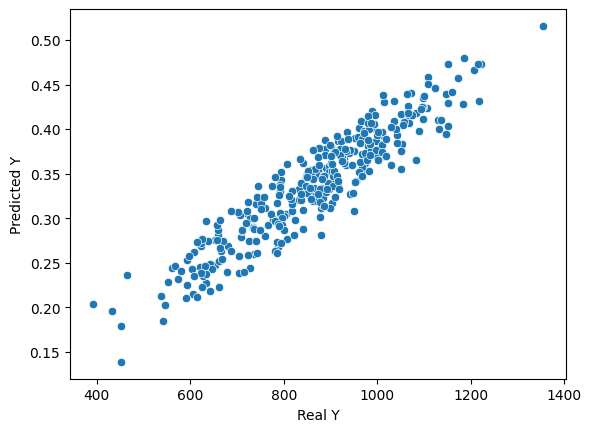

In [ ]:
sbn.scatterplot(x = "Real Y", y= "Predicted Y", data = df)